In [3]:
import pandas as pd
import re

In [4]:
# Read in data
train = pd.read_csv('data/train.csv')
val = pd.read_csv('data/val.csv')

In [6]:
# Helper function for cleaning text
def clean_html(text):
    if pd.isna(text):
        return text
    # Remove HTML tags
    clean = re.sub(r'<.*?>', '', str(text))
    # Remove extra whitespaces
    clean = re.sub(r'\s+', ' ', clean).strip()
    # Replace HTML entities
    clean = re.sub(r'&amp;', '&', clean)
    clean = re.sub(r'&lt;', '<', clean)
    clean = re.sub(r'&gt;', '>', clean)
    clean = re.sub(r'&quot;|&#34;', '"', clean)
    clean = re.sub(r'&apos;|&#39;', "'", clean)
    return clean

In [20]:
clean_train = train.copy()
clean_train['snip'] = clean_train['snip'].apply(clean_html)

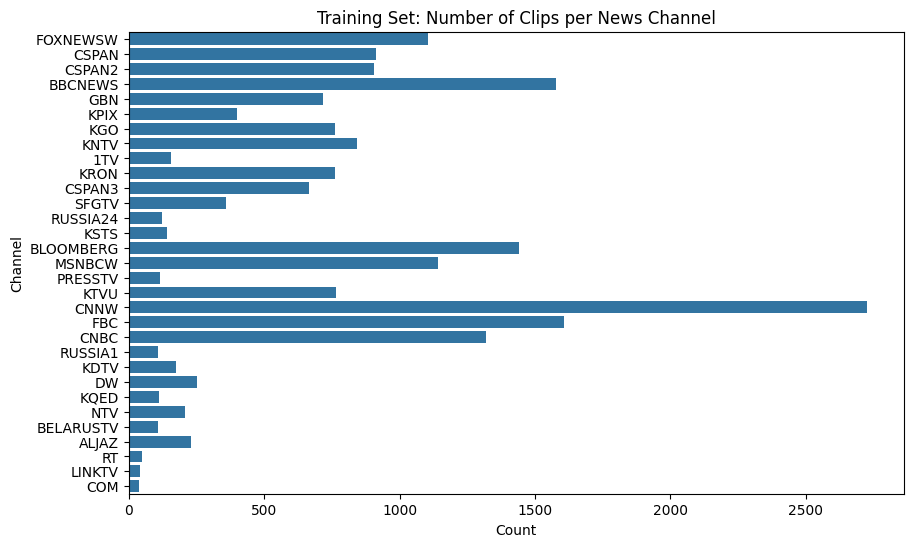

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(y=train['channel'])
plt.title('Training Set: Number of Clips per News Channel')
plt.xlabel('Count')
plt.ylabel('Channel')
plt.show()


In [23]:
clean_train

,snip,channel
0,"first of all, it feels like covid again but in...",FOXNEWSW
1,to be a software drivenrganization where softw...,CSPAN
2,you discuss the power of ai to revolutionize t...,CSPAN2
3,ai bots like chatgpt and google's bard gained ...,BBCNEWS
4,. >> i could sleep ten hours ai night if i was...,FOXNEWSW
...,...,...
19868,"cardiovascular science, but they're also pione...",FOXNEWSW
19869,i of ai in different fields. have of ai in dif...,BBCNEWS
19870,"weighing down on the major averages, both tech...",KTVU
19871,i also think crypto ai that legislation be fro...,CSPAN2


In [26]:
val = pd.read_csv('data/val.csv')
clean_val = val.copy()
clean_val['snip'] = clean_val['snip'].apply(clean_html)

In [27]:
clean_val

,snip,channel
0,. ♪ >> there's a kyu cho right have things tha...,BLOOMBERG
1,he says the ai tool helped create a new fronti...,KPIX
2,. >> the all new godaddy arrow put your busine...,CNNW
3,in some cases they are powered by generative a...,CSPAN
4,this was a ivotal it comes to ai. this was a p...,BBCNEWS
...,...,...
3034,"however, the ai trade is only one part of the ...",CNBC
3035,oz but also was highlighted as a product by cr...,CSPAN2
3036,the all new godaddy airo helps you get your bu...,CNBC
3037,we are going to be way ahead on ai. we have to...,CNBC
